**Creating a synthetic dataset**

We'll start by creating a simple toy dataset made of blobs

In [ ]:
from sklearn.datasets import make_moons, make_blobs, make_circles

n_samples = 2000
blobs = make_blobs(n_samples=n_samples, random_state=8)

Let's visualize it

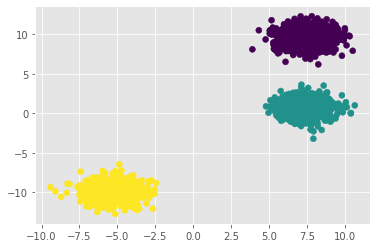

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.scatter(blobs[0][:, 0], blobs[0][:, 1], c=blobs[1])

**K-means clustering**

Let's see how k-means will cluster this dataset
We will also plot the centers of the clusters (the "k" "means")

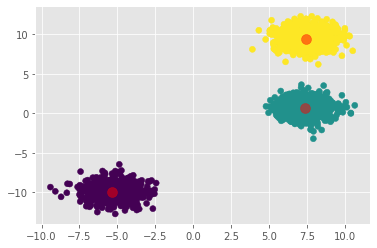

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(3, random_state=0)
labels_blobs = kmeans.fit_predict(blobs[0])
plt.scatter(blobs[0][:, 0], blobs[0][:, 1], c=labels_blobs)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)

**The effect of noise in data**

Let's add some noise in the data and see how k-means will cluster this dataset

We will make the clusters larger until they overlap

Try to gradually increase the std of the clusters


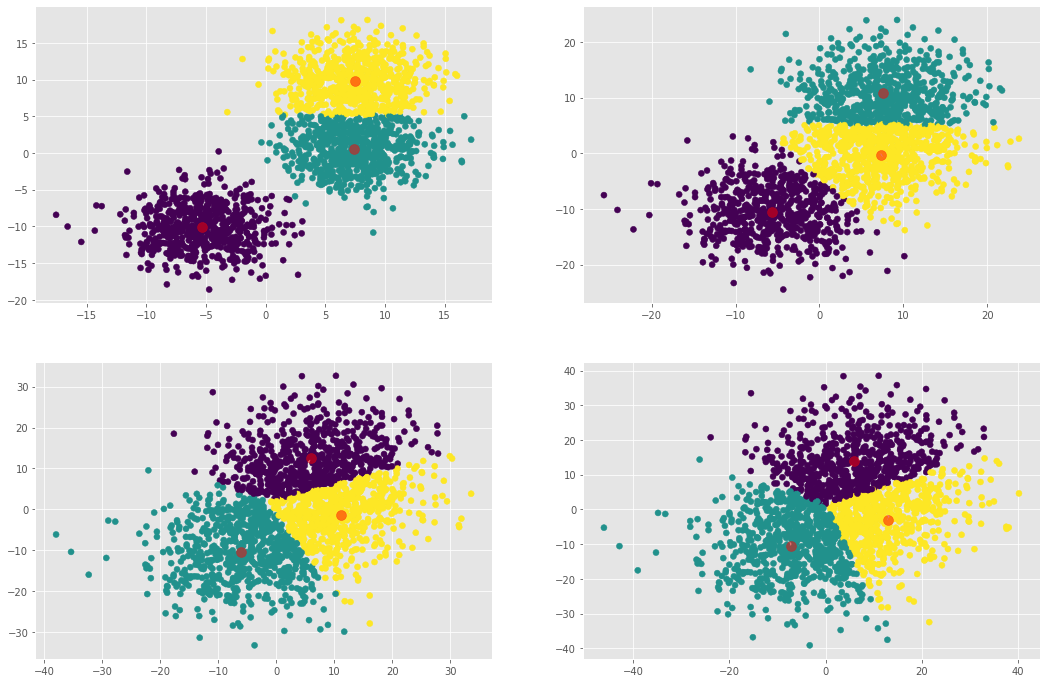

In [ ]:
n_samples = 2000

fig, ax = plt.subplots(2, 2, figsize=(18, 12)) #Tab

blobs = make_blobs(n_samples=n_samples, cluster_std=3, random_state=8)
labels_blobs = kmeans.fit_predict(blobs[0])
ax[0,0].scatter(blobs[0][:, 0],blobs[0][:, 1], c=labels_blobs) # Send in the first case of the tab
ax[0,0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red', s=100, alpha=0.5)

blobs = make_blobs(n_samples=n_samples, cluster_std=5, random_state=8)
labels_blobs = kmeans.fit_predict(blobs[0])
ax[0,1].scatter(blobs[0][:,0],blobs[0][:, 1],c=labels_blobs)
ax[0,1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red', s=100, alpha=0.5)

blobs = make_blobs(n_samples=n_samples, cluster_std=8, random_state=8)
labels_blobs = kmeans.fit_predict(blobs[0])
ax[1,0].scatter(blobs[0][:, 0],blobs[0][:,1],c=labels_blobs)
ax[1,0].scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],c='red', s=100, alpha=0.5)

blobs = make_blobs(n_samples=n_samples, cluster_std=10, random_state=8)
labels_blobs = kmeans.fit_predict(blobs[0])
ax[1,1].scatter(blobs[0][:, 0],blobs[0][:, 1],c=labels_blobs)
ax[1,1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red', s=100, alpha=0.5)



**The effect of the initialization**

Text(8, -30, '17 iterations')

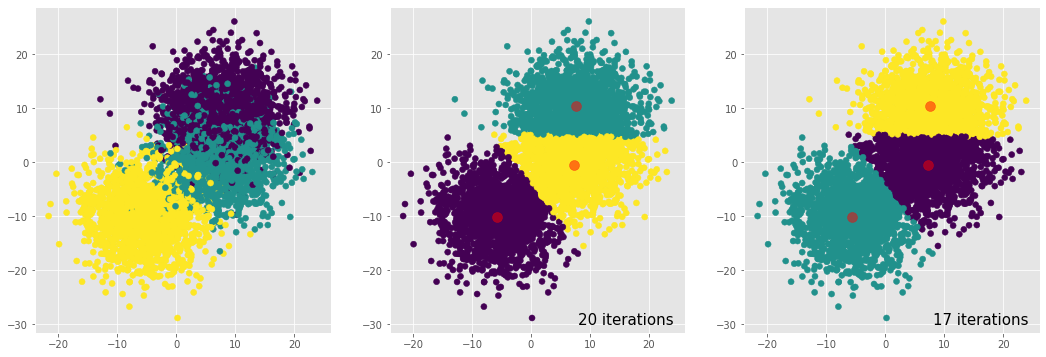

In [ ]:
blobs = make_blobs(n_samples= 5000, cluster_std=5, random_state=8)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].scatter(blobs[0][:, 0], blobs[0][:, 1], c=blobs[1])

kmeans = KMeans(3, init="k-means++", random_state=0)
labels_blobs = kmeans.fit_predict(blobs[0])
centers = kmeans.cluster_centers_
ax[1].scatter(blobs[0][:, 0], blobs[0][:, 1], c=labels_blobs)
ax[1].scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
ax[1].text(8, -30, ('%d iterations' %kmeans.n_iter_), size=15)

kmeans = KMeans(3, init="random", random_state=0)
labels_blobs = kmeans.fit_predict(blobs[0])
centers = kmeans.cluster_centers_
ax[2].scatter(blobs[0][:, 0], blobs[0][:, 1], c=labels_blobs)
ax[2].scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
ax[2].text(8, -30, ('%d iterations' %kmeans.n_iter_), size=15)






**How to fix the K ?**

We'll try the elbow method

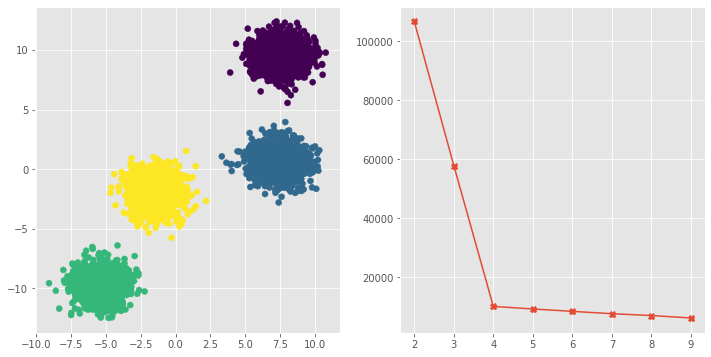

In [ ]:
n_samples = 5000
blobs = make_blobs(n_samples=n_samples, random_state=8, centers=4)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(blobs[0][:, 0], blobs[0][:, 1], c=blobs[1])
perfs = []

for i in range(2, 10) : 
  kmeans = KMeans(i, random_state=0)
  kmeans.fit(blobs[0])
  perfs.append(kmeans.inertia_)

ax[1].plot(range(2,10), perfs, marker="X")

**The effect of the shape of data**


In [ ]:
from sklearn.datasets import make_moons, make_blobs, make_circles

n_samples = 2000
blobs = make_blobs(n_samples=n_samples, random_state=8)
noisy_circles = make_circles(n_samples=n_samples, factor=0.5, noise=.05)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)

Let's visualize our datasets

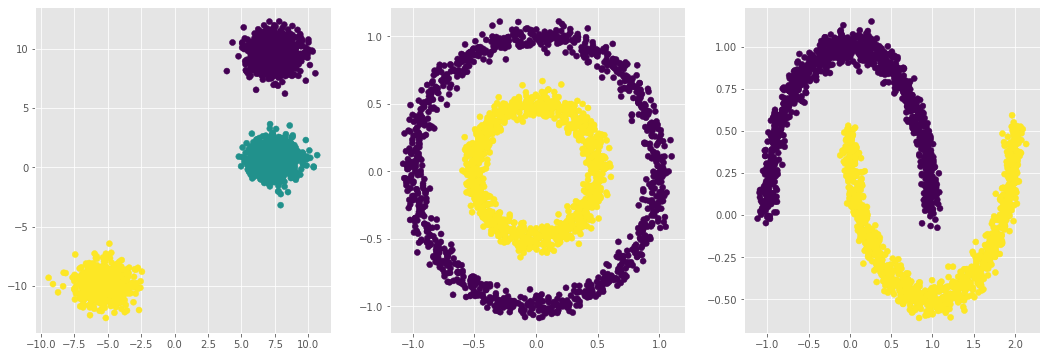

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].scatter(blobs[0][:, 0], blobs[0][:, 1], c=blobs[1])
ax[1].scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1], c=noisy_circles[1])
ax[2].scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1], c=noisy_moons[1])

Let's see how k-means will cluster each of these datasets

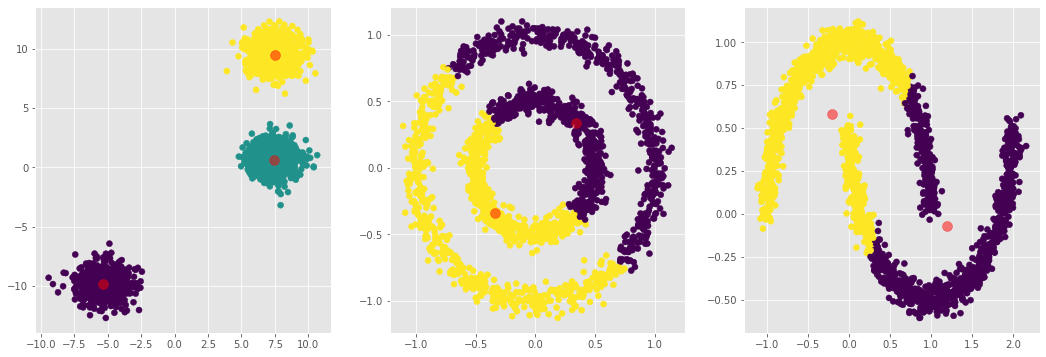

In [ ]:
from sklearn.cluster import KMeans

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
kmeans = KMeans(3, random_state=0)
labels_blobs = kmeans.fit_predict(blobs[0])
ax[0].scatter(blobs[0][:, 0], blobs[0][:, 1], c=labels_blobs)
centers = kmeans.cluster_centers_
ax[0].scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);

kmeans = KMeans(2, random_state=0)
labels_circles = kmeans.fit_predict(noisy_circles[0])
ax[1].scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1], c=labels_circles)
centers = kmeans.cluster_centers_
ax[1].scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);

kmeans = KMeans(2, random_state=0)
labels_moons = kmeans.fit_predict(noisy_moons[0])
ax[2].scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1], c=labels_moons)
centers = kmeans.cluster_centers_
ax[2].scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);
              

**Hierarchical clustering**

Let's try a hierarchical clustering and compare it's results ot k-means

Try different linkage methods(ward, complete, average, single) ?

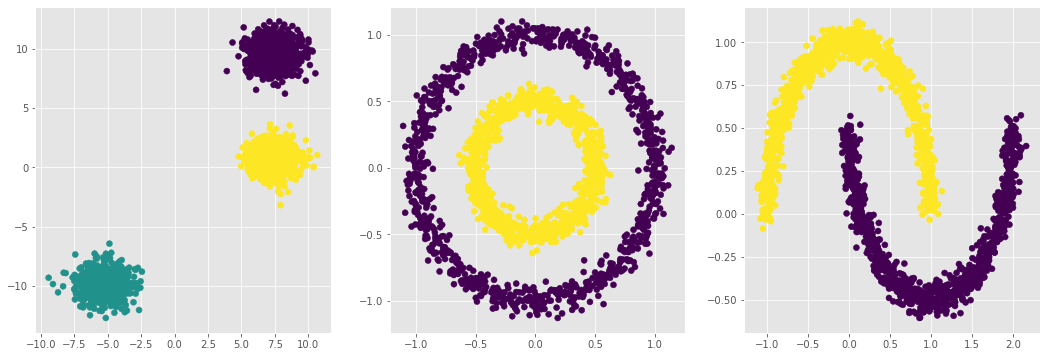

In [ ]:
from sklearn.cluster import AgglomerativeClustering

lnk = 'single'

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
aggclust = AgglomerativeClustering(n_clusters=3, linkage=lnk)
labels_blobs = aggclust.fit_predict(blobs[0])
ax[0].scatter(blobs[0][:, 0], blobs[0][:, 1], c=labels_blobs)

aggclust = AgglomerativeClustering(n_clusters=2, linkage=lnk)
labels_circles = aggclust.fit_predict(noisy_circles[0])
ax[1].scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1], c=labels_circles)

aggclust = AgglomerativeClustering(n_clusters=2, linkage=lnk)
labels_moons = aggclust.fit_predict(noisy_moons[0])
ax[2].scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1], c=labels_moons)

Let's plot the dendogram

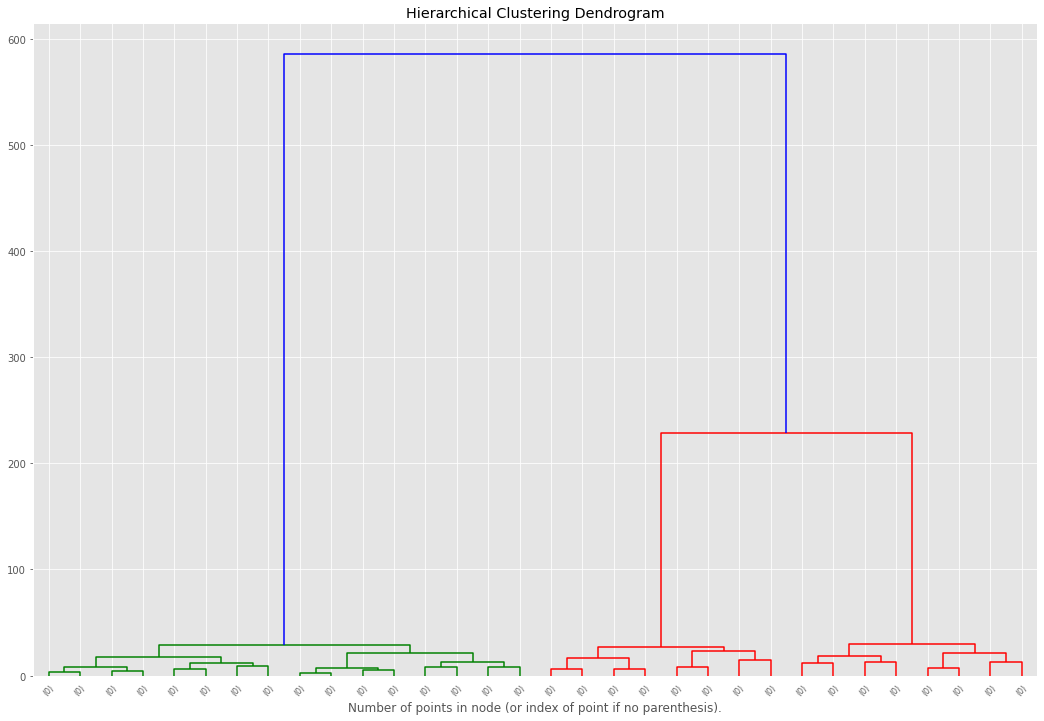

In [ ]:
from scipy.cluster.hierarchy import dendrogram 

import numpy as np 
fig, ax = plt.subplots(1, 1, figsize=(18, 12)) 

def plot_dendrogram(model, **kwargs): 
    # Create linkage matrix and then plot the dendrogram 
    
    # create the counts of samples under each node 
    counts = np.zeros(model.children_.shape[0]) 
    n_samples = len(model.labels_) 
    for i, merge in enumerate(model.children_): 
        current_count = 0 
        for child_idx in merge: 
            if child_idx < n_samples: 
                current_count += 1 # leaf node 
            else: 
                current_count += counts[child_idx - n_samples] 
            counts[i] = current_count 
            
        linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float) 
        
        # Plot the corresponding dendrogram 
        dendrogram(linkage_matrix, **kwargs) 
        return 
    
aggclust = AgglomerativeClustering(distance_threshold=0, n_clusters=None) 
aggclust = aggclust.fit(blobs[0]) 

plt.title('Hierarchical Clustering Dendrogram') 
# plot the top three levels of the dendrogram 
plot_dendrogram(aggclust, truncate_mode='level', p=4) 
plt.xlabel("Number of points in node (or index of point if no parenthesis).") 
plt.show() 
